In [9]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv('dataset/USA_Housing.csv')

In [59]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [60]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [61]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set_style('darkgrid')
%matplotlib inline

In [65]:
df.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

In [64]:
df.rename(columns={"Avg. Area Number of Bedrooms":"Avg_Area_Number_of_Bedrooms",
                  "Avg. Area Income":"Avg_Area_Income",
                  "Avg. Area House Age":"Avg_Area_House_Age",
                  "Avg. Area Number of Rooms":"Avg_Area_Number_of_Rooms",
                  "Area Population":"Area_Population"},inplace=True)

In [53]:
m1=ols('Price ~ Avg_Area_Number_of_Bedrooms',data=df).fit()
m1_summary=m1.summary()

In [54]:
m1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           3.81e-34
Time:                        08:10:33   Log-Likelihood:                -70893.
No. Observations:                5000   AIC:                         1.418e+05
Df Residuals:                    4998   BIC:                         1.418e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.037e+06   1.66e+04     62.403      0.000       1e+06    1.07e+06
Avg_Area_Number_of_Bedrooms  4.895e+04   3987.568     12.275      0.000    4.11e+04    5.68e+04
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.895
Skew:                           0.010   Prob(JB):                        0.639
Kurtosis:                       2.938   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

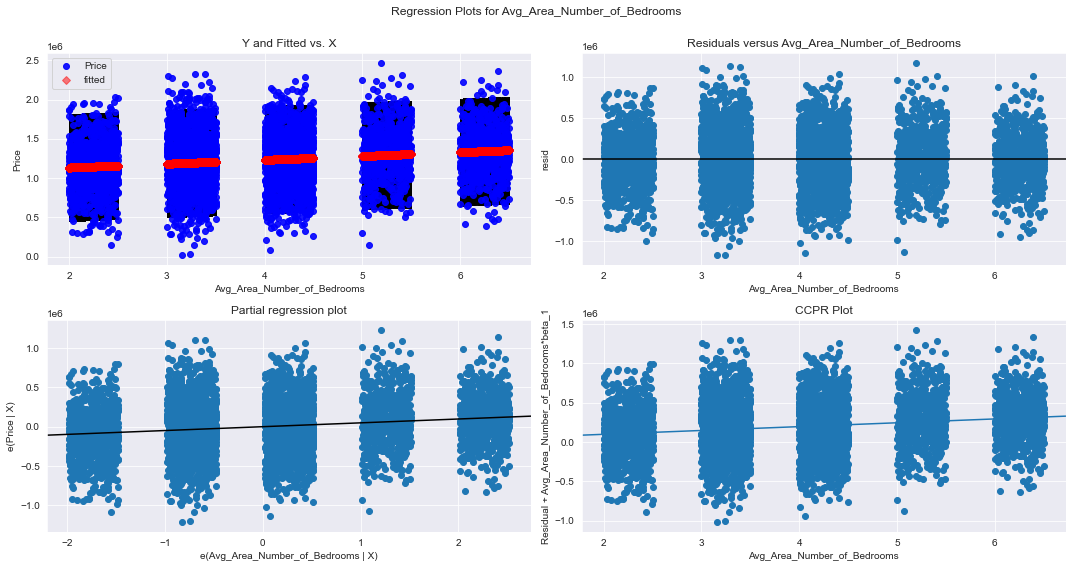

In [55]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(m1,"Avg_Area_Number_of_Bedrooms",fig=fig)

In [66]:
df.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

In [67]:
housing_model2 = ols("""Price ~ Avg_Area_Income
                                              +Avg_Area_House_Age
                                              + Avg_Area_Number_of_Rooms
                                              + Avg_Area_Number_of_Bedrooms
                                              + Area_Population""",data=df).fit()

housing_model2_summary = housing_model2.summary()

In [68]:
housing_model2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:12:12   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
Avg_Area_Income                21.5780      0.134    160.656      0.000      21.315      21.841
Avg_Area_House_Age           1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
Avg_Area_Number_of_Rooms     1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
Avg_Area_Number_of_Bedrooms  1651.1391   1308.671      1.262      0.207    -914.431    4216.709
Area_Population                15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

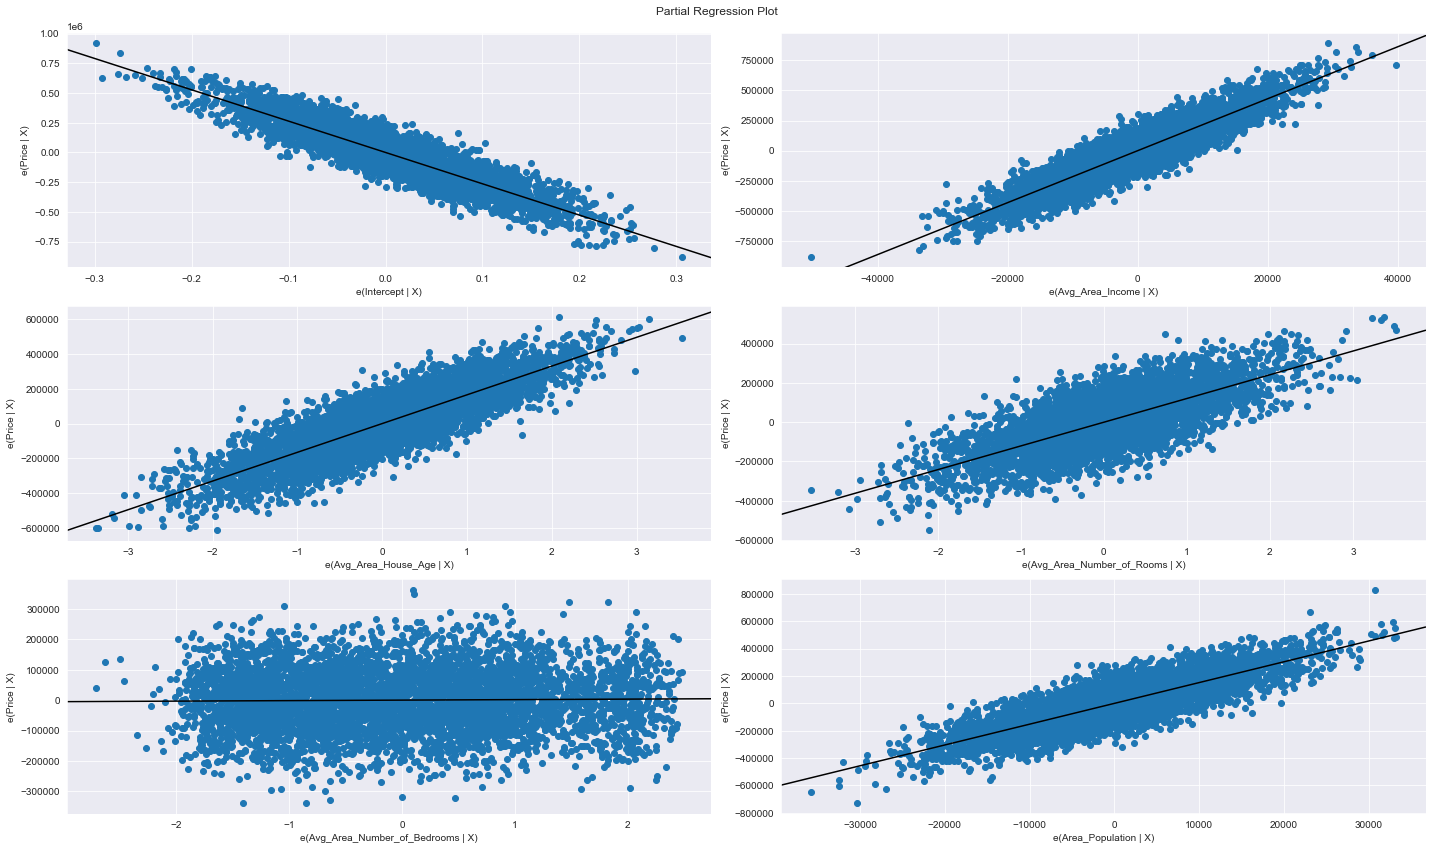

In [69]:
fig = plt.figure(figsize=(20,12))

fig = sm.graphics.plot_partregress_grid(housing_model2,fig=fig)